In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


pd.set_option('display.max_columns', 25, 'display.max_rows', 25)

In [3]:
df = pd.read_csv('maternal_mortality copy.csv')
print(df.shape)
df.head()

(316, 14)


,state,year,deaths,cruderate,ageadjustedrate,sttax,hispanic,nhblack,nhwhite,nhother,lhs,hs,somecol,colplus
0,Alabama,2005,12,1.3,1.2,42.5,0.048214,0.298214,0.621428,0.032143,0.192857,0.357143,0.233929,0.216071
1,Alabama,2016,30,3.1,3.2,67.5,0.050193,0.266409,0.646718,0.036680,0.106178,0.318533,0.277992,0.297297
2,Arizona,2008,11,0.9,0.8,200.0,0.399777,0.021158,0.459911,0.119154,0.168152,0.345212,0.249443,0.237194
3,Arizona,2010,14,1.1,1.2,200.0,0.377382,0.038119,0.470140,0.114358,0.160102,0.321474,0.298602,0.219822
4,Arizona,2011,12,0.9,0.9,200.0,0.347826,0.020531,0.442029,0.189613,0.164251,0.336956,0.274155,0.224638


In [5]:
df.dropna(axis = 0, inplace = True)

In [7]:
df.columns

Index(['state', 'year', 'deaths', 'cruderate', 'ageadjustedrate', 'sttax',
       'hispanic', 'nhblack', 'nhwhite', 'nhother', 'lhs', 'hs', 'somecol',
       'colplus'],
      dtype='object')

In [33]:
features = ['year', 'deaths', 'cruderate', 'ageadjustedrate', 'sttax',
       'hispanic', 'nhblack', 'nhwhite', 'nhother', 'lhs', 'hs', 'somecol',
       'colplus']

In [34]:
# preprocess the data 
from sklearn.preprocessing import StandardScaler
# Separating out the features
# x = df.drop(columns=['state'], axis=1).values
x = df.loc[:,features].values


In [35]:
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [36]:
# create principal components 
from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2',
                                                                 'principal component 3','principal component 4',
                                                                 'principal component 5','principal component 6','pricipal component 7',
                                                                 'principal component 8','principal component 9','pricipal component 10',
                                                                 'principal component 11','principal component 12','pricipal component 13',])

In [46]:
f = (pca.explained_variance_ratio_)
[round(x, 5) for x in f]

[0.24908,
 0.22452,
 0.16188,
 0.10435,
 0.07852,
 0.06188,
 0.04149,
 0.03681,
 0.02487,
 0.01633,
 0.00027,
 0.0,
 0.0]

In [38]:
#eigenvalues
pca.explained_variance_

array([3.24840013e+00, 2.92801277e+00, 2.11113302e+00, 1.36085468e+00,
       1.02398073e+00, 8.07036186e-01, 5.41040884e-01, 4.80108020e-01,
       3.24382857e-01, 2.12986043e-01, 3.46595192e-03, 3.28567211e-13,
       7.71813957e-14])

In [39]:
eig_values = pca.explained_variance_
eig_vectors = pca.components_
print(eig_values)
print(eig_vectors)

[3.24840013e+00 2.92801277e+00 2.11113302e+00 1.36085468e+00
 1.02398073e+00 8.07036186e-01 5.41040884e-01 4.80108020e-01
 3.24382857e-01 2.12986043e-01 3.46595192e-03 3.28567211e-13
 7.71813957e-14]
[[-9.08243693e-02 -1.69338389e-02  3.29806631e-01  3.26041390e-01
  -3.49324074e-01 -8.30233620e-02  2.44970897e-01 -2.63027613e-02
  -1.61563137e-01  3.43622898e-01  4.04878366e-01  2.14312787e-01
  -4.82421195e-01]
 [-7.79563921e-02  4.30336792e-01  1.46140228e-02  1.43191475e-02
   5.34237055e-02  5.35421138e-01 -1.19428402e-01 -5.02522194e-01
   3.17945709e-01  3.07861619e-01  5.49210129e-02 -2.15495697e-01
  -8.16693927e-02]
 [ 4.83097858e-01  1.07822676e-01  5.09215152e-01  5.12587792e-01
   2.19950374e-01 -1.11785135e-04  6.50421918e-02 -1.08989387e-01
   1.61693346e-01 -2.65927567e-01 -1.66512393e-01  1.38021802e-01
   1.57538750e-01]
 [ 1.34739365e-01 -1.76667719e-01 -4.04381144e-02 -3.13176814e-02
   2.42708337e-01  6.82371309e-02 -6.39001896e-01  2.25580381e-01
   3.43558810e-01

In [40]:
# examine the first pricipal component
eig_vectors[0]

array([-0.09082437, -0.01693384,  0.32980663,  0.32604139, -0.34932407,
       -0.08302336,  0.2449709 , -0.02630276, -0.16156314,  0.3436229 ,
        0.40487837,  0.21431279, -0.48242119])

In [41]:
# examine the components
pc1 = pca.components_[0]
pc2 = pca.components_[1]
# the .components attribute shows principal axes in feature space, representing the directions of maximum variance in the data. 
#The components are sorted by explained_variance_

print(pc1)
print(pc2)

[-0.09082437 -0.01693384  0.32980663  0.32604139 -0.34932407 -0.08302336
  0.2449709  -0.02630276 -0.16156314  0.3436229   0.40487837  0.21431279
 -0.48242119]
[-0.07795639  0.43033679  0.01461402  0.01431915  0.05342371  0.53542114
 -0.1194284  -0.50252219  0.31794571  0.30786162  0.05492101 -0.2154957
 -0.08166939]


### First PC: Education

In [59]:
eig_values[0]

3.2484001318065836

In [53]:
# get the loadings
structure_loading_1 = pc1* np.sqrt(eig_values[0])
str_loading_1 = pd.Series(structure_loading_1, index=features)
str_loading_1.sort_values(ascending=False)

hs                 0.729725
lhs                0.619322
cruderate          0.594421
ageadjustedrate    0.587635
nhblack            0.441519
somecol            0.386263
deaths            -0.030520
nhwhite           -0.047406
hispanic          -0.149636
year              -0.163696
nhother           -0.291190
sttax             -0.629598
colplus           -0.869483
dtype: float64

### Second PC: Race... maybe?

In [52]:
# get the loadings
structure_loading_2 = pc2* np.sqrt(eig_values[1])
str_loading_2 = pd.Series(structure_loading_2, index=features)
str_loading_2.sort_values(ascending=False)

hispanic           0.916183
deaths             0.736368
nhother            0.544051
lhs                0.526795
hs                 0.093978
sttax              0.091416
cruderate          0.025007
ageadjustedrate    0.024502
year              -0.133395
colplus           -0.139748
nhblack           -0.204359
somecol           -0.368744
nhwhite           -0.859888
dtype: float64

### Scree Plot

Text(0, 0.5, 'proportion of explained variance')

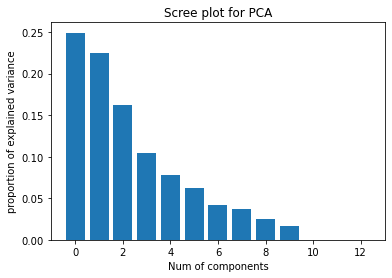

In [44]:
index = np.arange(13)
plt.bar(index, pca.explained_variance_ratio_)
plt.title('Scree plot for PCA')
plt.xlabel('Num of components')
plt.ylabel('proportion of explained variance')

In [49]:
np.cumsum(pca.explained_variance_ratio_)

array([0.24908367, 0.4736004 , 0.63547971, 0.73982852, 0.81834621,
       0.88022884, 0.92171525, 0.95852939, 0.9834027 , 0.99973423,
       1.        , 1.        , 1.        ])

In [56]:
sum(pca.explained_variance_ratio_[:8])

0.9585293910943171

In [54]:
#We are keeping 8 PCs
#They explain about 96% of the variance in our dataset
#Name for PCs 1. Education, 2. Race